In [205]:
import numpy as np
from numpy.linalg import norm
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import skimage
from torch.utils.data.sampler import SubsetRandomSampler

In [214]:
indices = list(range(60000))
#if shuffle == True:
np.random.seed(0)
np.random.shuffle(indices)

train_idx, valid_idx = indices[10000:], indices[:10000]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


In [259]:
train_data, train_labels = torch.load('/nfs/masi/gaor2/data/mnist/fashion/processed/training.pt')
print (train_data.shape, train_labels.shape)

val_data = train_data[:10000]
val_labels = train_labels[:10000]

train_data = train_data[10000:]
train_labels = train_labels[10000:]

for i in range(10):
    print (sum(val_labels.numpy() == i))
torch.save([train_data, train_labels], '/nfs/masi/gaor2/data/mnist/fashion_trvaltt/processed/training.pt')
torch.save([val_data, val_labels], '/nfs/masi/gaor2/data/mnist/fashion_trvaltt/processed/val.pt')


torch.Size([60000, 28, 28]) torch.Size([60000])
942
1027
1016
1019
974
989
1021
1022
990
1000


In [248]:
set(val_labels.numpy().tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

torch.Size([28, 28]) tensor(0.8269) tensor(5.)


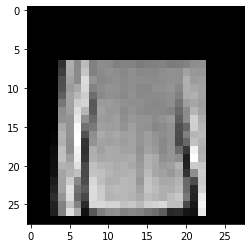

In [109]:
train_data, train_labels = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/crossM_cls/20210120_base/gen_fashion/processed/training.pt')
mask, mask_labels = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/crossM_cls/20210120_base/gen_fashion/processed/mask_test.pt')
#masked_data = train_data * mask 

col = 8
row = 8

img_numpy = np.zeros((col * 28, row * 28))

for i in range(row):
    for j in range(col):
        img_numpy[28 *  i:  28 * ( i + 1), 28  * j: 28 * (j + 1)] = train_data[i * col + j].numpy()

plt.imsave('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/crossM_cls/20210120_base/gen_fashion/processed/training.png', img_numpy, cmap = 'gray')

torch.save([masked_data, train_labels], '/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/crossM_cls/20210120_base/masked_fashion/processed/test.pt')
print (train_data[index].shape, train_data[index].max(), train_labels[index])
plt.imshow(masked_data[index], cmap = 'gray')


In [158]:
train_data, train_labels = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/train_0639.pt')
#train_data, train_labels = torch.load('/nfs/masi/gaor2/data/mnist/fashion/processed/test.pt')

col = 10
row = 10

img_numpy = np.zeros((col * 28, row * 28))

for i in range(row):
    for j in range(col):
        img_numpy[28 *  i:  28 * ( i + 1), 28  * j: 28 * (j + 1)] = train_data[i * col + j].numpy()

print (img_numpy.min(), img_numpy.max(), img_numpy.mean(), img_numpy.std())

skimage.io.imsave('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/train_0639.png', img_numpy)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.1678077537560207e-23 0.9998893737792969 0.12120603171217352 0.2861872266581199


(torch.Size([60000, 28, 28]), torch.Size([60000]))

torch.Size([28, 28]) tensor(254, dtype=torch.int32) tensor(8.)


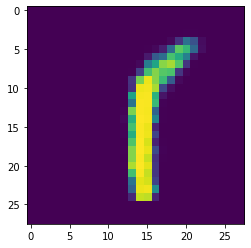

In [202]:
train_data, train_labels = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/processed/test.pt')
index = 1
print (train_data[index].shape, train_data[index].max(), train_labels[index])
#plt.imshow(train_data1[index], cmap = 'gray')
mask = torch.zeros(train_data.shape)
mask[:, 3:-3, 3:-3] = 1
#torch.save([train_data * 255, train_labels], '/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/test_255scale_gen.pt')
test_255scale = train_data.float() * mask
#test_255scale = train_data.int() #* 255
torch.save([test_255scale, train_labels], '/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/test_255scale_gen_masked.pt')

plt.imshow(test_255scale[0])
#print (test_255scale[0].min(), test_255scale[0].max(), test_255scale[0].mean())



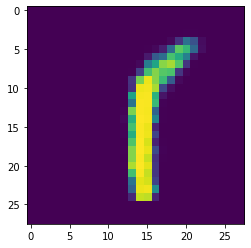

In [203]:
train_data,train_labels = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_mcls/fashion-pbigan/allfeatv2_1231.111205_block_10_None/gen_imgs/processed/test.pt')
plt.imshow(train_data[0])


In [204]:
test_255scale[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

tensor(0.) tensor(255.) tensor(23.5383)


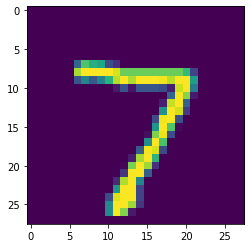

In [175]:
train_data, train_labels = torch.load('/nfs/masi/gaor2/data/mnist/MNIST/processed/test.pt')

print (train_data[0].float().min(), train_data[0].float().max(), train_data[0].float().mean())

plt.imshow(train_data[0])


In [261]:
rnd1 = np.random.RandomState(1) 
print (rnd1.randint(0, 100))
rnd1.randint(0, 100)

37


12

Pred shape : (9984, 128)
Target shape : (9984, 1)


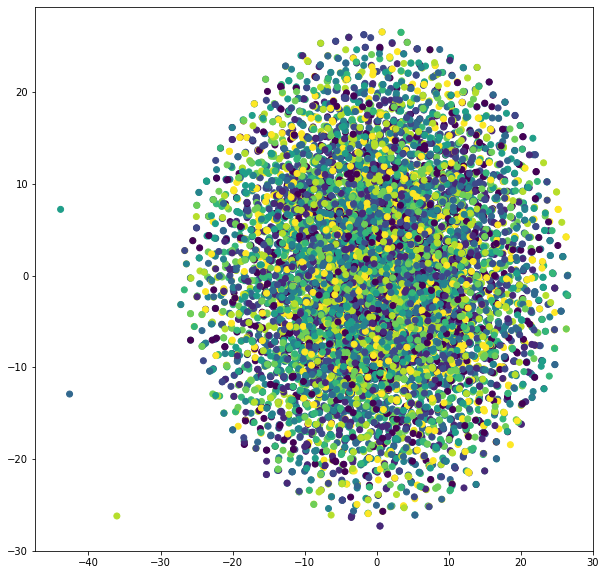

In [23]:
#feature = np.load('./mnist_test.npy').astype(np.float64)
output_array = z_gen.numpy().astype(np.float64)
target_array = np.load('./mnist_test_label.npy')

print('Pred shape :',output_array.shape)
print('Target shape :',target_array.shape)

tsne = TSNE(n_components=2, init='pca', random_state=0)
output_array = tsne.fit_transform(output_array)
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(output_array[:, 0], output_array[:, 1], c= target_array[:,0])
plt.show()
# title = 'tSNE'
# plt.savefig('./'+title+'.png', bbox_inches='tight')

Pred shape : (9984, 128)
Target shape : (9984, 1)


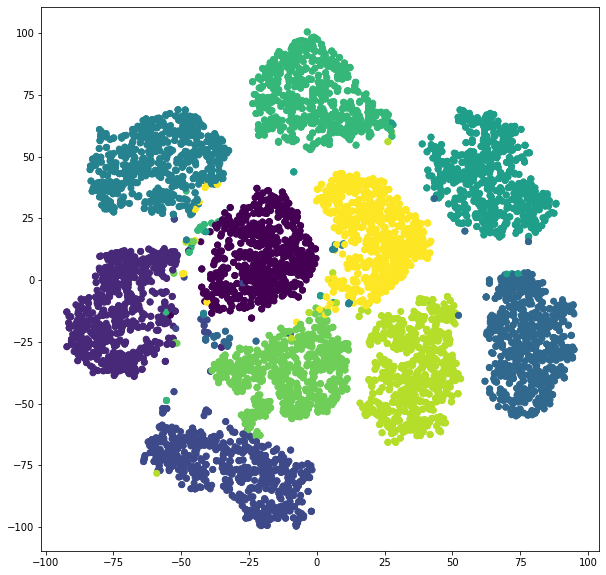

In [24]:
output_array = np.load('./mnist_test.npy').astype(np.float64)
#output_array = z_gen.numpy().astype(np.float64)
target_array = np.load('./mnist_test_label.npy')

print('Pred shape :',output_array.shape)
print('Target shape :',target_array.shape)

tsne = TSNE(n_components=2, init='pca', random_state=0)
output_array = tsne.fit_transform(output_array)
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(output_array[:, 0], output_array[:, 1], c= target_array[:,0])
plt.show()

In [58]:
output_array =  np.load('./mnist_test.npy').astype(np.float64)
for i in range(9984):
    output_array[i] = output_array[i] / norm(output_array[i])
output_array = z_gen.numpy().astype(np.float64)
target_array = np.load('./mnist_test_label.npy')

print('Pred shape :',output_array.shape)
print('Target shape :',target_array.shape)

tsne = TSNE(n_components=2, init='pca', random_state=0)
output_array = tsne.fit_transform(output_array)
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(output_array[:, 0], output_array[:, 1], c= target_array[:,0])
plt.show()

Pred shape : (9984, 128)
Target shape : (9984, 1)


In [61]:
norm(10 * output_array[i])

10.0

In [62]:
z_randn = torch.randn(100, 128)

In [65]:
norm(z_randn.numpy()[45])

10.739933

In [11]:

from pretrain_onemiss_train import PBiGAN
from mnist_decoder import ConvDecoder
from mnist_encoder import ConvEncoder

In [12]:
decoder = ConvDecoder(128)
encoder = ConvEncoder(128, 2, logprob=False)
pbigan = PBiGAN(encoder, decoder, 'bce')

In [13]:
model_dict = torch.load('/nfs/masi/gaor2/saved_file/MissClinic/MNIST2Fashion/MissGAN/pretrain_onemiss_cls/mnist-pbigan/allfeatv2_0906.153153_block_12_None/model.pth')

In [16]:

pbigan.load_state_dict(model_dict['pbigan'])

In [8]:
import torch
a = torch.zeros((2,3))
b = torch.ones((2,3))
from torch.distributions.normal import Normal
qz_x = Normal(a, b)
qz_x.rsample()

tensor([[-0.2883, -0.7250, -0.3420],
        [-2.2603,  0.1822,  1.0838]])

In [3]:
import numpy as np
from scipy import linalg
array_2d = np.array([[1, 4], [9, 16]], dtype=np.float)
covmean, _ = linalg.sqrtm(array_2d, disp=False)
print (covmean)

[[0.46619725+0.93588272j 0.88601752-0.21885995j]
 [1.99353943-0.4924349j  3.78876296+0.11515789j]]
